# Tutorial 4: STARmap PlUS 
We performed recovery and generation experiments on the mouse olfactory bulb. In this tutorial, we only focus on generation experiment. On the tissue section, we generated unmeasured spots in the gaps of the measured spots, which are two times the number of the measured spots. We got high-density generated gene expression profiles by STABox-STAGE.

The STARmap PlUS data can be downloaded from https://singlecell.broadinstitute.org/single_cell/study/SCP1830.

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
import warnings
warnings.filterwarnings("ignore")
from stabox.extension import STAGE

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
path = "D:\\Users\\lqlu\\work\\Data\\STABox_Data\\STARmap\\嗅球"
adata = sc.read(os.path.join(path,'stamp_plus_ob.h5ad'))
adata.var_names_make_unique()

In [4]:
adata

AnnData object with n_obs × n_vars = 15790 × 1022
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Main_molecular_cell_type'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Main_molecular_cell_type_colors', 'log1p', 'hvg'
    obsm: 'spatial'

In [5]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=1022)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [8]:
adata.obsm['coord'] = adata.obsm['spatial']

In [11]:
save_path = 'D:\\Users\\lqlu\\work\\Codes\\STABox'
filepath = '\\GATE_STARmap_MODB_OUT_0523' 
if os.path.isfile(save_path+filepath):
    os.mkdir(filepath)

In [12]:
adata_stage=STAGE(
    adata, 
    save_path=save_path+filepath, 
    data_type='arbitrary', 
    experiment='higher_res', 
    coord_sf=5000, 
    expand_time=2,
    rad_off=50,
    train_epoch=10000, 
    seed=1234,
    batch_size=2048, 
    learning_rate=1e-3, 
    w_recon=0.1, 
    w_w=0.1, 
    w_l1=0.1,
    relu=False,
    device='cuda:0',
    path1=f'{save_path+filepath}/file_tmp',
)

Epochs: 100%|██| 10000/10000 [9:58:29<00:00,  3.59s/it, latent_loss: 0.00935, recon_loss: 1.18829, total_loss: 0.01282]


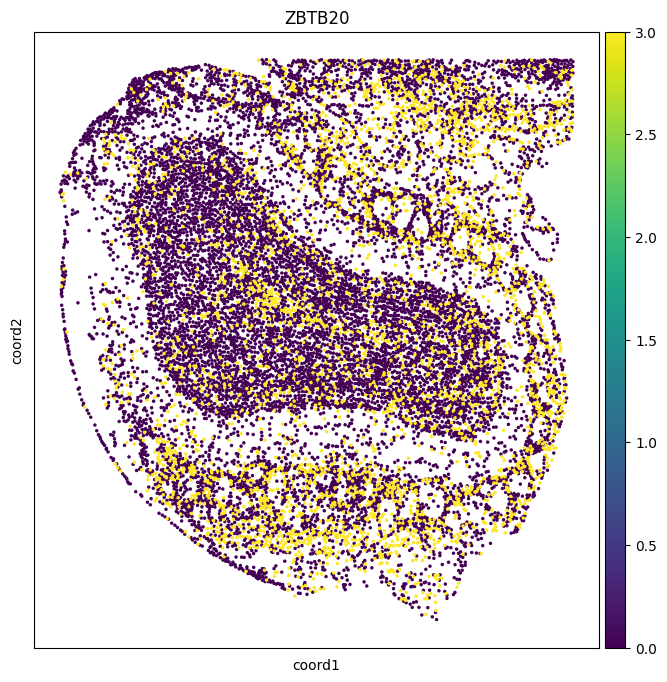

In [27]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.embedding(adata,basis='coord',color='ZBTB20', show=True,vmax=3,s=25)

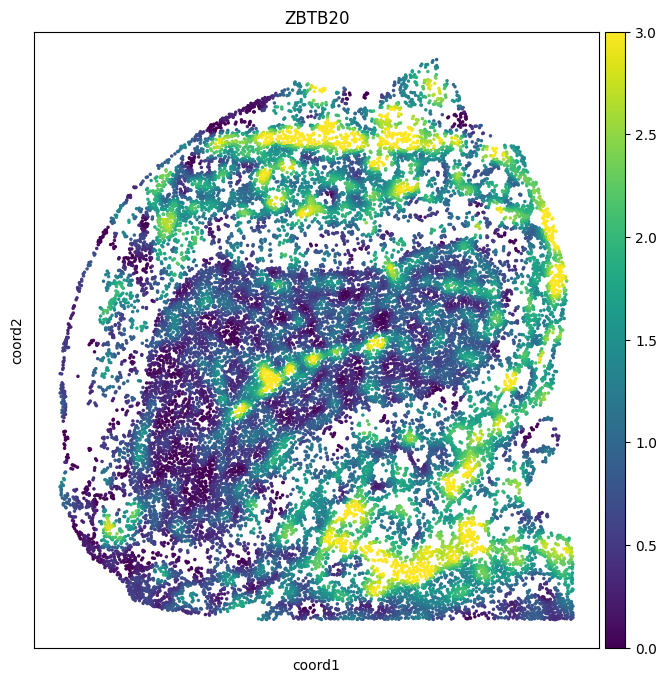

In [35]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.embedding(adata_stage,basis='coord',color='ZBTB20', show=True,vmax=3,s=25,save='STARmap_STAGE.png')